In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import json
from pandas.io.json import json_normalize

In [2]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

visits = pd.read_sql('SELECT * FROM Visits', con=db_connection)
visits['created'] = pd.to_datetime(visits['created'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['lastmodified'] = pd.to_datetime(visits['lastmodified'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['registered'] = visits['registered'].replace(0, np.nan)
visits['registered'] = pd.to_datetime(visits['registered'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['deleted'] = visits['deleted'].replace(0, np.nan)
visits['deleted'] = pd.to_datetime(visits['deleted'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['paired'] = visits['paired'].replace(0, np.nan)
visits['paired'] = pd.to_datetime(visits['paired'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['first_accessed'] = pd.to_datetime(visits['first_accessed'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['exported'].replace(0, np.nan, inplace=True)
visits['title'].fillna(value=np.nan, inplace=True)
visits['note'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 1000)

In [4]:
visits

,id,shortcode,user_id,created,lastmodified,registered,expires,paired,ticket,deleted,created_ip,registered_ip,paired_ip,processed,purchased_by_user_id,note,exported,first_accessed,ignore_first_accessed,title
0,794965,20141029u305,0,2014-10-29 17:10:47-04:00,2016-02-23 17:57:37-05:00,2014-10-29 17:10:47-04:00,0,2014-10-29 17:13:56-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""794965"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T17:10:47-04:00""}",2014-10-29 19:19:52-04:00,0,0,0,0,0,NaN,NaN,NaT,1.0,NaN
1,795317,foo001,0,2014-10-29 19:32:29-04:00,2016-02-23 17:57:37-05:00,2014-10-29 19:32:29-04:00,0,2014-10-29 19:33:06-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""795317"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T19:32:29-04:00""}",2014-10-29 19:35:18-04:00,0,0,0,0,0,NaN,NaN,NaT,1.0,NaN
2,795341,foo002,0,2014-10-29 19:40:51-04:00,2016-02-23 17:57:37-05:00,2014-10-29 19:40:51-04:00,0,2014-10-29 19:41:08-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""795341"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T19:40:51-04:00""}",2014-10-29 19:41:21-04:00,0,0,0,0,0,NaN,NaN,NaT,1.0,NaN
3,795351,foo003,0,2014-10-29 19:43:31-04:00,2016-02-23 17:57:37-05:00,2014-10-29 19:43:31-04:00,0,2014-10-29 19:44:28-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""795351"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T19:43:31-04:00""}",2014-10-29 19:44:34-04:00,0,0,0,0,0,NaN,NaN,NaT,1.0,NaN
4,795405,foo004,0,2014-10-29 20:13:47-04:00,2016-02-23 17:57:37-05:00,2014-10-29 20:13:47-04:00,0,2014-10-29 20:14:13-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""795405"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T20:13:47-04:00""}",2014-10-29 20:14:41-04:00,0,0,0,0,0,NaN,NaN,NaT,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716277,132806719,56bs6,0,2020-07-09 09:11:50-04:00,2020-07-09 09:22:11-04:00,2020-07-09 09:12:12-04:00,0,NaT,"{""status"":""Attendance recorded for ticket: 940560"",""ticket_id"":""940560"",""shortcode"":""56bs6"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:12AM"",""attended"":""1"",""type"":null}",NaT,1198074958,1198074958,0,0,0,NaN,NaN,2020-07-09 09:22:11-04:00,NaN,NaN
716278,132806727,cvszd,0,2020-07-09 09:16:19-04:00,2020-07-09 09:22:42-04:00,2020-07-09 09:16:32-04:00,0,NaT,"{""status"":""Attendance recorded for ticket: 940561"",""ticket_id"":""940561"",""shortcode"":""cvszd"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:16AM"",""attended"":""1"",""type"":null}",NaT,1198074958,1198074958,0,0,0,NaN,NaN,2020-07-09 09:22:42-04:00,NaN,NaN
716279,132806735,zrbqg,0,2020-07-09 09:19:41-04:00,2020-07-09 09:22:54-04:00,2020-07-09 09:19:58-04:00,0,NaT,"{""status"":""Attendance recorded for ticket: 940562"",""ticket_id"":""940562"",""shortcode"":""zrbqg"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:19AM"",""attended"":""1"",""type"":null}",NaT,1198074958,1198074958,0,0,0,NaN,NaN,2020-07-09 09:22:54-04:00,NaN,NaN
716280,132806749,Jr656,0,2020-07-09 09:40:43-04:00,2020-07-09 09:40:43-04:00,2020-07-09 09:40:42-04:00,0,NaT,"{""status"":""Attendance recorded for ticket: 940563"",""ticket_id"":""940563"",""shortcode"":""Jr656"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:40AM"",""attended"":""1"",""type"":null}",NaT,1198074958,1198074958,0,0,0,NaN,NaN,NaT,NaN,NaN


In [5]:
visits['first_accessed'].sort_values()
#first log of this column in 2016-02-24

133970   2016-02-24 09:52:43-05:00
142658   2016-02-24 09:53:51-05:00
142668   2016-02-24 10:06:58-05:00
144219   2016-02-24 10:11:21-05:00
141261   2016-02-24 10:13:05-05:00
                    ...           
716268                         NaT
716271                         NaT
716272                         NaT
716280                         NaT
716281                         NaT
Name: first_accessed, Length: 716282, dtype: datetime64[ns, US/Eastern]

In [6]:
visit_accessed = visits[['user_id', 'created', 'first_accessed', 'ignore_first_accessed']]

In [7]:
visit_accessed = visit_accessed[visit_accessed['ignore_first_accessed'].isna()]

In [8]:
visit_accessed['time_between'] = visit_accessed['first_accessed'] - visit_accessed['created']

In [9]:
visit_accessed

,user_id,created,first_accessed,ignore_first_accessed,time_between
144641,0,2016-02-24 09:46:38-05:00,NaT,NaN,NaT
144642,0,2016-02-24 09:55:22-05:00,NaT,NaN,NaT
144643,0,2016-02-24 09:55:58-05:00,NaT,NaN,NaT
144644,0,2016-02-24 09:56:38-05:00,NaT,NaN,NaT
144645,0,2016-02-24 09:57:33-05:00,2016-02-24 19:37:53-05:00,NaN,09:40:20
...,...,...,...,...,...
716277,0,2020-07-09 09:11:50-04:00,2020-07-09 09:22:11-04:00,NaN,00:10:21
716278,0,2020-07-09 09:16:19-04:00,2020-07-09 09:22:42-04:00,NaN,00:06:23
716279,0,2020-07-09 09:19:41-04:00,2020-07-09 09:22:54-04:00,NaN,00:03:13
716280,0,2020-07-09 09:40:43-04:00,NaT,NaN,NaT


In [8]:
visit_accessed['time_between'].mean()
#~7.5 weeks
#need to keep exploring the post_engagemnt: if the first_access is absolute true, 
#why the values when claculating first logs in created and bundle not giving the same

Timedelta('53 days 00:27:39.603057')

In [9]:
visit_accessed_notna = visit_accessed[visit_accessed['first_accessed'].notna()]

In [10]:
visit_accessed_notna['first_accessed'].count()
#114,616 visits led to retreive information  

114616

In [11]:
visit_accessed_notna['first_accessed'].count() / visits['created'].count() * 100
#perc of engagment

16.001518954825055

## per time 

In [12]:
visit_accessed_yealry = visit_accessed['first_accessed'].groupby(visit_accessed.first_accessed.dt.to_period('Y')).agg('count')
visit_accessed_yealry
#2017 was the most engagement 

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


first_accessed
2016    32697
2017    44592
2018    18916
2019    15257
2020     3154
Freq: A-DEC, Name: first_accessed, dtype: int64

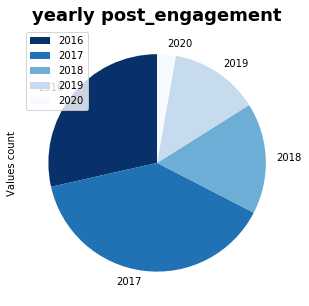

In [13]:
visit_accessed_yealry.plot.pie(y='start', figsize=(5, 5), startangle=90, cmap='Blues_r')
plt.title('yearly post_engagement', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()

In [14]:
visit_yearly = visits['created'].groupby(visits.created.dt.to_period('Y')).agg('count')
visit_yearly

created
2014       187
2015    119850
2016    212266
2017    140780
2018    127085
2019     98688
2020     17426
Freq: A-DEC, Name: created, dtype: int64

In [15]:
visit_accessed_yealry[0] / visit_yearly[2] * 100

15.403785815910226

In [16]:
visit_accessed_yealry[3] / visits['created'].count() * 100

2.130027000538894

In [17]:
per_year = [{2016: visit_accessed_yealry[0] / visit_yearly[2] * 100, 2017: visit_accessed_yealry[1] / visit_yearly[3] * 100,
            2018: visit_accessed_yealry[2] / visit_yearly[4] * 100, 2019: visit_accessed_yealry[3] / visit_yearly[5] * 100, 
            2020: visit_accessed_yealry[4] / visit_yearly[6] * 100}]

first_access_per_year = pd.DataFrame(per_year).transpose()
first_access_per_year = first_access_per_year.rename({0: 'percentage_first_access'}, axis=1)
first_access_per_year.reset_index(inplace=True)
first_access_per_year = first_access_per_year.rename({'index': 'year'}, axis=1)
first_access_per_year

,year,percentage_first_access
0,2016,15.403786
1,2017,31.674954
2,2018,14.884526
3,2019,15.459833
4,2020,18.099392


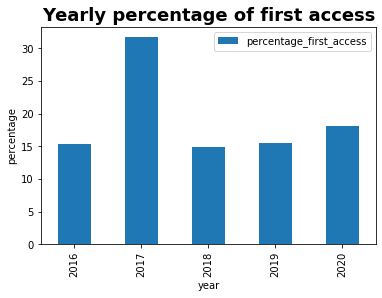

In [20]:
first_access_per_year.plot.bar(x='year', y='percentage_first_access', rot=0)
plt.title('Yearly percentage of first access', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('percentage')
# plt.savefig('Yearly_percentage_of_first_access.png', dpi=300)

# how many user ID are connected to first_access


In [10]:
visit_accessed_notna = visit_accessed[visit_accessed['first_accessed'].notna()]

In [90]:
visit_accessed_notna['user_id'].drop_duplicates()
#12,738 users retrieved their items

144645        0
144650    10058
144652    10057
144672    10043
144683    10036
          ...  
715721    30980
715994    30538
716005    30587
716105    30558
716267    28814
Name: user_id, Length: 12738, dtype: int64

# what is the percentage of not opening account


In [134]:
user_zero_access = visit_accessed_notna[visit_accessed_notna['user_id'] == 0]

In [140]:
user_zero_access['user_id'].count() / visits['user_id'].count() * 100
#14% of the visiters retreived their information but didn't opened account

14.082163170371444

# what items are associated with the visitors that checked their info

In [3]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

visitsItems = pd.read_sql('SELECT * FROM VisitsItems', con=db_connection)
visitsItems['created'] = pd.to_datetime(visitsItems['created'], unit='s')
visitsItems['lastmodified'] = pd.to_datetime(visitsItems['lastmodified'], unit='s')
visitsItems['deleted'].replace(0, np.nan, inplace=True)
visitsItems['deleted'] = pd.to_datetime(visitsItems['deleted'], unit='s')
# visitsItems['status_id'].replace(0, np.nan, inplace=True)
visitsItems['processed'].replace(0, np.nan, inplace=True)
visitsItems['title'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
visitsItems['description'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
visitsItems['title'] = visitsItems['title'].astype('category')
visitsItems['description'] = visitsItems['description'].astype('category')

In [11]:
access_no_zero = visit_accessed_notna[visit_accessed_notna['user_id'] != 0]
visitsItems_clean = visitsItems.drop(['refers_to_id', 'deleted','status_id','description', 'title', 'processed', 'input_id'], axis=1)

In [12]:
merged_access_items = access_no_zero.merge(visitsItems_clean, on='user_id', how='right')
merged_access_items 

,user_id,created_x,first_accessed,ignore_first_accessed,time_between,id,action_id,tool_id,bundle_id,refers_to_uid,created_y,lastmodified
0,10032,2016-02-24 15:31:17-05:00,2016-02-24 16:33:59-05:00,NaN,01:02:42,94189537,1,0,94183843,69172057,2016-02-24 20:33:21,2016-02-24 21:39:36
1,10032,2016-02-24 15:31:17-05:00,2016-02-24 16:33:59-05:00,NaN,01:02:42,94189539,1,0,94183843,69155053,2016-02-24 20:33:52,2016-02-24 21:39:36
2,10032,2016-02-24 15:31:17-05:00,2016-02-24 16:33:59-05:00,NaN,01:02:42,94189541,1,0,94183843,69155051,2016-02-24 20:33:52,2016-02-24 21:39:37
3,10032,2016-02-24 15:31:17-05:00,2016-02-24 16:33:59-05:00,NaN,01:02:42,94189543,1,0,94183843,69155049,2016-02-24 20:33:52,2016-02-24 21:39:37
4,10032,2016-02-24 15:31:17-05:00,2016-02-24 16:33:59-05:00,NaN,01:02:42,94189545,1,0,94183843,69155047,2016-02-24 20:33:52,2016-02-24 21:39:37
...,...,...,...,...,...,...,...,...,...,...,...,...
18489759,17704,NaT,NaT,NaN,NaT,115394395,1,0,115394343,18341115,2017-05-30 15:46:55,2017-05-30 15:49:07
18489760,17704,NaT,NaT,NaN,NaT,115394397,1,0,115394343,18468271,2017-05-30 15:46:58,2017-05-30 15:49:07
18489761,17704,NaT,NaT,NaN,NaT,115394399,1,0,115394343,18548447,2017-05-30 15:48:10,2017-05-30 15:49:07
18489762,17704,NaT,NaT,NaN,NaT,115394401,1,0,115394343,18543887,2017-05-30 15:48:15,2017-05-30 15:49:07


In [13]:
retrieved_items = merged_access_items['refers_to_uid'].value_counts()

In [14]:
retrieved_items = retrieved_items.to_frame()

In [15]:
retrieved_items.rename({'refers_to_uid': 'count'}, axis=1, inplace=True)

In [16]:
retrieved_items.reset_index(inplace=True)
retrieved_items.rename({'index': 'refers_to_uid'}, axis=1, inplace=True)

In [17]:
retrieved_items.head(10)

,refers_to_uid,count
0,18703475,63789
1,18703473,63259
2,18703477,60356
3,18703503,59390
4,35460287,57869
5,18703481,52058
6,18703485,51838
7,18187831,48011
8,18703479,44983
9,35460437,43170
